# Восстановление золота из руды

Подготовим прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используем данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

План работы:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект используем библиотеки *pandas*, *matplotlib* и *sklearn.*

# Описание данных

Когда добытая руда проходит первичную обработку, получается дроблёная смесь. Её отправляют на флотацию (обогащение) и двухэтапную очистку.
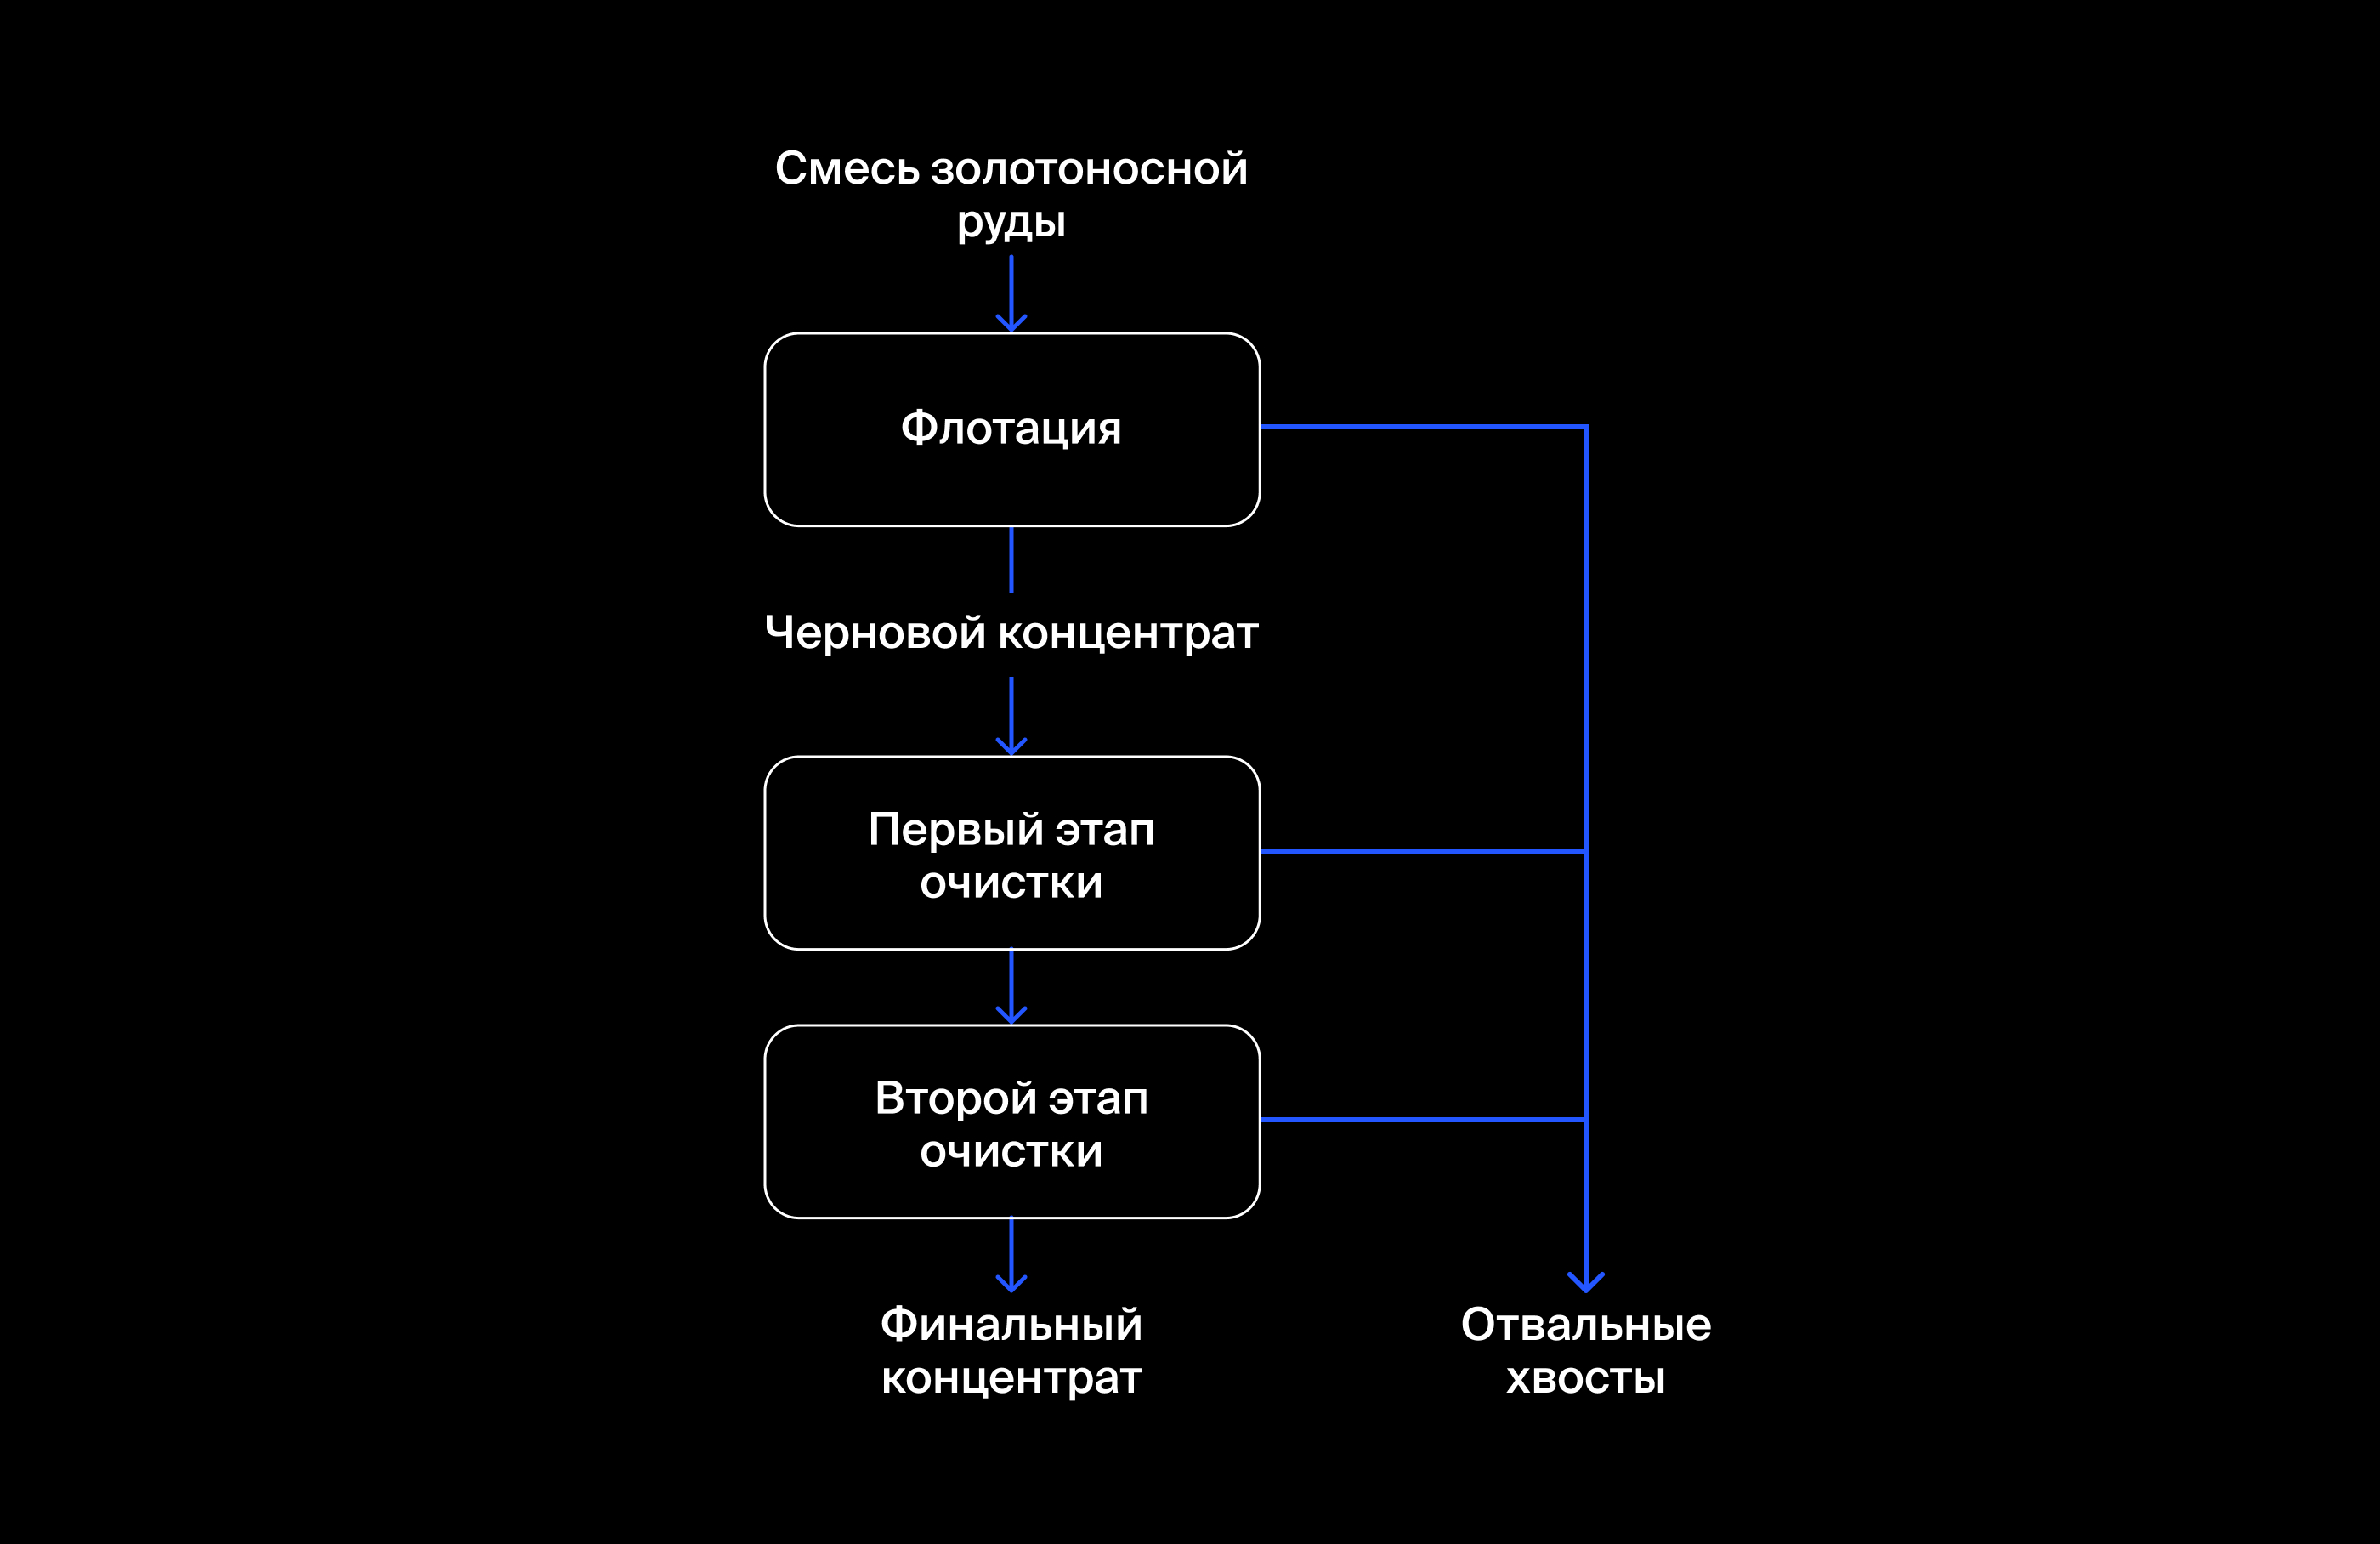

Технологический процесс
- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
- Xanthate **— ксантогенат (промотер, или активатор флотации);
- Sulphate — сульфат (на данном производстве сульфид натрия);
- Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота

Параметры этапов
- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи
- Наименование признаков

Наименование признаков должно быть такое:
[этап].[тип_параметра].[название_параметра]

Пример: rougher.input.feed_ag
    
Возможные значения для блока [этап]:
- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

Возможные значения для блока [тип_параметра]:
- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверим,-что-эффективность-обогащения-рассчитана-правильно." data-toc-modified-id="Проверим,-что-эффективность-обогащения-рассчитана-правильно.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверим, что эффективность обогащения рассчитана правильно.</a></span></li><li><span><a href="#Проанализируем-признаки,-недоступные-в-тестовой-выборке." data-toc-modified-id="Проанализируем-признаки,-недоступные-в-тестовой-выборке.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проанализируем признаки, недоступные в тестовой выборке.</a></span></li><li><span><a href="#Проведем-предобработку-данных." data-toc-modified-id="Проведем-предобработку-данных.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проведем предобработку данных.</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки." data-toc-modified-id="Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.</a></span></li><li><span><a href="#Сравним-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках." data-toc-modified-id="Сравним-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.</a></span></li><li><span><a href="#Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах." data-toc-modified-id="Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Напишем-функцию-для-вычисления-итоговой-sMAPE." data-toc-modified-id="Напишем-функцию-для-вычисления-итоговой-sMAPE.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Напишем функцию для вычисления итоговой sMAPE.</a></span></li><li><span><a href="#Обучим-разные-модели-и-оценим-их-качество-кросс-валидацией.-Выберем-лучшую-модель-и-проверим-её-на-тестовой-выборке." data-toc-modified-id="Обучим-разные-модели-и-оценим-их-качество-кросс-валидацией.-Выберем-лучшую-модель-и-проверим-её-на-тестовой-выборке.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучим разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель и проверим её на тестовой выборке.</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('/datasets/gold_recovery_full_new.csv')
df.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [4]:
train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [6]:
test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

Вывод: данные содержат информацию о концентрациях металлов и параметры очистки на различных стадиях технологического процесса очистки руды. Таблица **test** содержит не все столбцы, которые есть в полном и тренеровачном датасетах. 

*Данные сгруппированы по столбцу **data**, а все необходимые нам величины указаны в долях содержания соответствующих веществ*.

### Проверим, что эффективность обогащения рассчитана правильно. 

Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между нашими расчётами и значением признака.



Эффективность обогащения рассчитывается по формуле
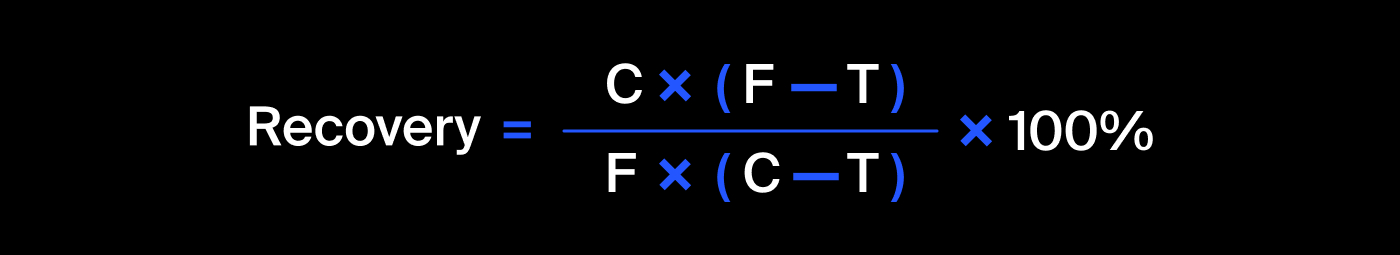
где:
- C — доля золота в концентрате после флотации/очистки (**'rougher.output.concentrate_au'**);
- F — доля золота в сырье/концентрате до флотации/очистки (**'rougher.input.feed_au'**);
- T — доля золота в отвальных хвостах после флотации/очистки (**'rougher.output.tail_au'**).

In [8]:
train['recovery'] = (train['rougher.output.concentrate_au']*(
    train['rougher.input.feed_au']-train['rougher.output.tail_au']))/(train['rougher.input.feed_au']*(
    train['rougher.output.concentrate_au']-train['rougher.output.tail_au']))*100

In [9]:
train[['rougher.output.recovery', 'recovery']]

,rougher.output.recovery,recovery
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794
...,...,...
14144,89.574376,89.574376
14145,87.724007,87.724007
14146,88.890579,88.890579
14147,89.858126,89.858126


In [10]:
mean_absolute_error(train['rougher.output.recovery'], train['recovery'])

9.73512347450521e-15

Вывод: Средняя абсолютная ошибка составляет 9.6e-15, что очень мало, значит значения признаков в данных очень точны.

### Проанализируем признаки, недоступные в тестовой выборке.

In [11]:
set(df.columns).symmetric_difference(set(test.columns))

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Вывод: Данные признаки являются выходными значениями на разных этапах очистки. Выходные значения не нужны для обучения и тестирования модели машинного обучения.

### Проведем предобработку данных.

Заполним NaN, используя ffill, так как он заполняет NaN последним наблюдением. 

In [12]:
df = df.ffill()
train = train.ffill()
test = test.ffill()

Добавим необходимую информацию в **test** из полного датафрейма

In [13]:
df_merge = df[["date", "rougher.output.recovery", "final.output.recovery", "rougher.output.concentrate_au", "rougher.output.concentrate_ag", "rougher.output.concentrate_pb", "rougher.output.concentrate_sol", "final.output.concentrate_au", "final.output.concentrate_ag", "final.output.concentrate_pb", "final.output.concentrate_sol"]]

In [14]:
test = test.merge(df_merge, on="date", how="left")
df_merge = df_merge.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)

Удалим столбцы с датами, поскольку они не нужны для обучения модели.

In [15]:
train = train.drop('date', axis=1)
test = test.drop('date', axis=1)
full = df.drop('date', axis=1)

## Анализ данных

### Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. 

In [16]:
metal_au = df[["rougher.input.feed_au", "rougher.output.concentrate_au", "primary_cleaner.output.concentrate_au", "final.output.concentrate_au"]]
metal_ag = df[["rougher.input.feed_ag", "rougher.output.concentrate_ag", "primary_cleaner.output.concentrate_ag", "final.output.concentrate_ag"]]
metal_pb = df[["rougher.input.feed_pb", "rougher.output.concentrate_pb", "primary_cleaner.output.concentrate_pb", "final.output.concentrate_pb"]]

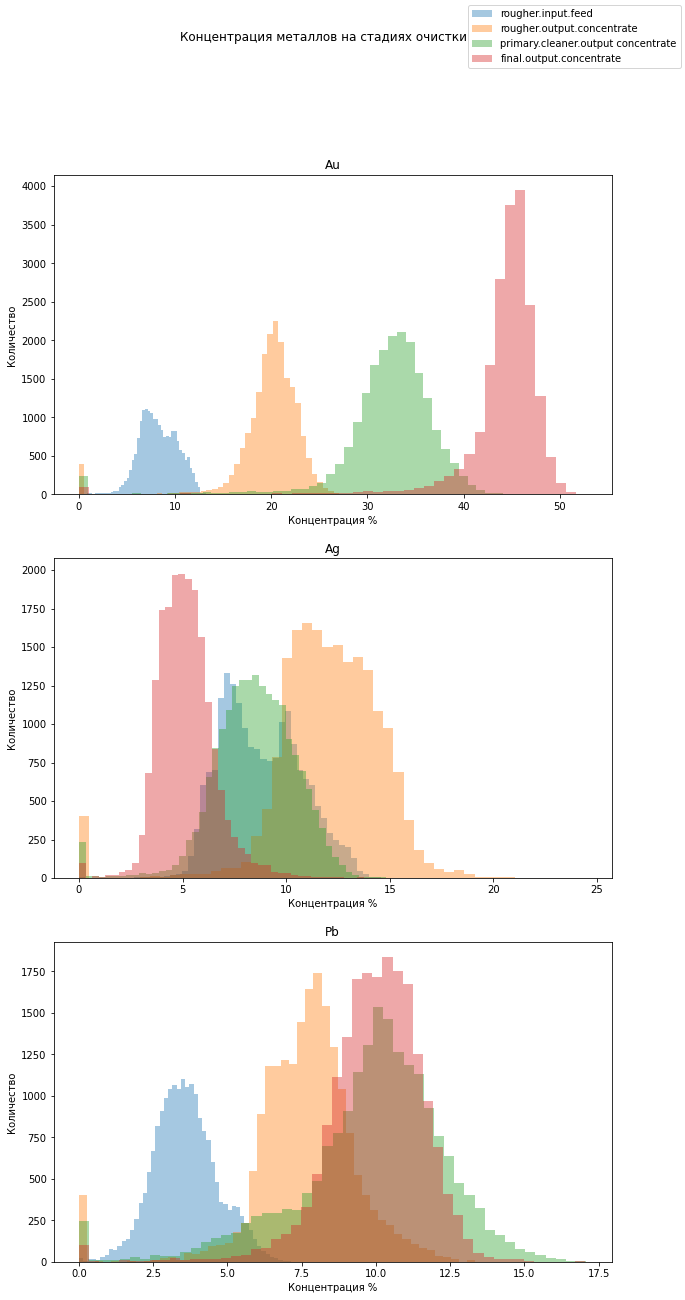

In [17]:
fig, axes = plt.subplots(3, 1, figsize=(10, 20))
for column in list(metal_au):
    sns.distplot(metal_au[column], ax=axes[0], kde=False)
axes[0].set(title="Au", xlabel="Концентрация %", ylabel="Количество")
for column in list(metal_ag):
    sns.distplot(metal_ag[column], ax=axes[1], kde=False)
axes[1].set(title="Ag", xlabel="Концентрация %", ylabel="Количество")
for column in list(metal_pb):
    sns.distplot(metal_pb[column], ax=axes[2], kde=False)
axes[2].set(title="Pb", xlabel="Концентрация %", ylabel="Количество")
fig.suptitle("Концентрация металлов на стадиях очистки")
fig.legend(["rougher.input.feed", "rougher.output.concentrate", "primary.cleaner.output concentrate", "final.output.concentrate",])
fig.show()

Вывод: Концентрация Au равномерно увеличивается на протяжении всей стадии ~~очистки~~ обработки. Концентрация Ag, наоборот, уменьшается на протяжении всех стадиях обработки. Концентрация Pb незначительно увеличивается, а потом остается на уровне первичной очистки.

### Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.

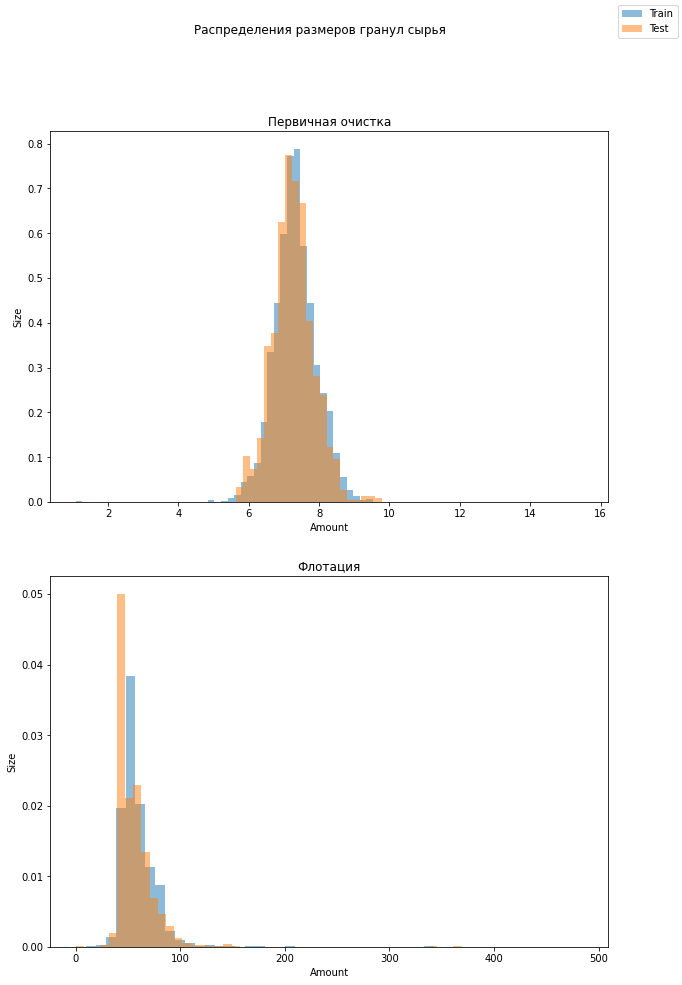

In [18]:
fig, axes = plt.subplots(2,1, figsize=(10, 15))

axes[1].hist(train["rougher.input.feed_size"], density=True, alpha=0.5, bins=50)
axes[1].hist(test["rougher.input.feed_size"], density=True, alpha=0.5, bins=50)
axes[1].set(title="Флотация", xlabel="Amount", ylabel="Size")

axes[0].hist(train["primary_cleaner.input.feed_size"], density=True, alpha=0.5, bins=50)
axes[0].hist(test["primary_cleaner.input.feed_size"], density=True, alpha=0.5, bins=50)
axes[0].set(title="Первичная очистка", xlabel="Amount", ylabel="Size")

fig.suptitle("Распределения размеров гранул сырья")
fig.legend(["Train", "Test"])
fig.show()

Распределение размеров гранул сырья на обучающей и тестовой выборках показывает, что размеры частиц существенно не различаются. Поэтому оценка модели должна быть правильной.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
<hr>
<b>Верно!👍:</b> Согласен, распределения выглядят похожими.
</div>

### Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [19]:
def raw_feed(data):
    return data["rougher.input.feed_au"] + data["rougher.input.feed_ag"] + data["rougher.input.feed_pb"] + data["rougher.input.feed_sol"]

In [20]:
def rougher_conc(data):
    return data["rougher.output.concentrate_au"] + data["rougher.output.concentrate_ag"] + data["rougher.output.concentrate_pb"] + data["rougher.output.concentrate_sol"]

In [21]:
def final_conc(data):
    return data["final.output.concentrate_au"] + data["final.output.concentrate_ag"] + data["final.output.concentrate_pb"] + data["final.output.concentrate_sol"]

In [22]:
df["rougher.input.feed"] = raw_feed(df)
df["rougher.output.concentrate"] = rougher_conc(df)
df["final.output.concentrate"] = final_conc(df)
sum_conc = df[["rougher.input.feed", "rougher.output.concentrate", "final.output.concentrate"]]

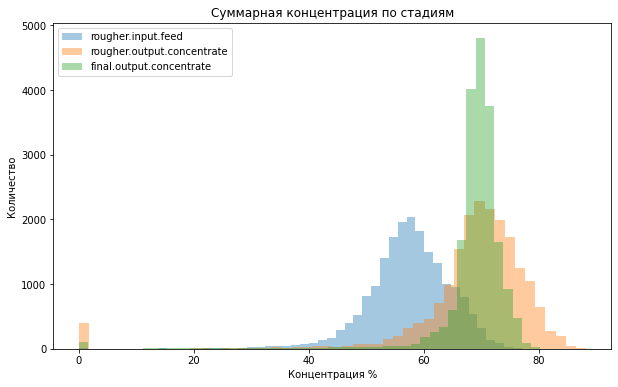

In [23]:
fig = plt.figure(figsize=(10, 6))
for column in list(sum_conc):
    sns.distplot(sum_conc[column], kde=False)
plt.legend(list(sum_conc))
plt.title("Суммарная концентрация по стадиям")
plt.xlabel("Концентрация %")
plt.ylabel("Количество")
fig.show()

Вывод: Все распределения концентрации на различных стадиях показывают аномальные значения при 0%. Поэтому стоит удалить  значения до 10% из обеих выборок, чтобы обеспечить точность модели:

In [24]:
train["rougher.input.feed"] = raw_feed(train)
train["rougher.output.concentrate"] = rougher_conc(train)
train["final.output.concentrate"] = final_conc(train)

train = train[(train["rougher.input.feed"] > 10) & (train["rougher.output.concentrate"] > 10) & (train["final.output.concentrate"] > 10)]
train = train.drop(["rougher.input.feed", "rougher.output.concentrate", "final.output.concentrate"], axis=1)

In [25]:
test["rougher.input.feed"] = raw_feed(test)
test["rougher.output.concentrate"] = rougher_conc(test)
test["final.output.concentrate"] = final_conc(test)

test = test[(test["rougher.input.feed"] > 10) & (test["rougher.output.concentrate"] > 10) & (test["final.output.concentrate"] > 10)]
test = test.drop(["rougher.input.feed", "rougher.output.concentrate", "final.output.concentrate"], axis=1)
test = test.drop(list(df_merge.columns.values), axis=1)

## Модель

### Напишем функцию для вычисления итоговой sMAPE.

sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).
Используем следующие формулы метрик качества:

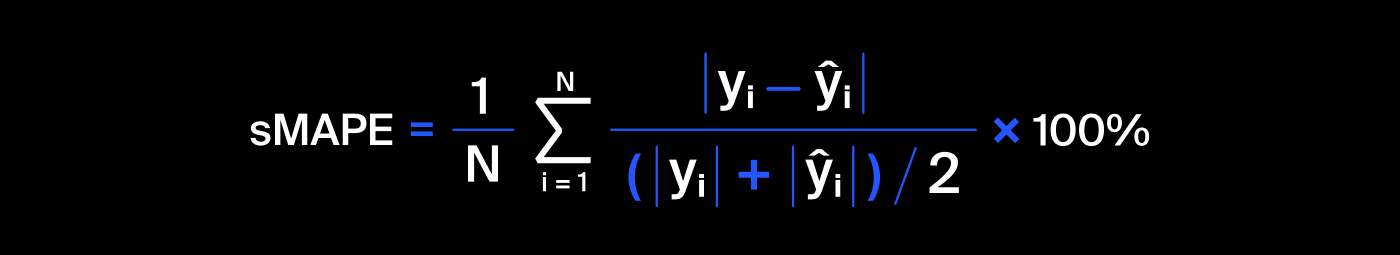

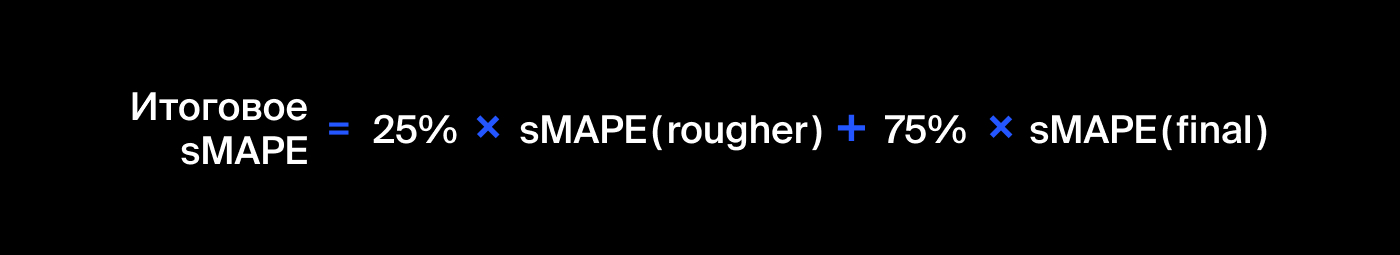

Обозначения:

- **y** - Значение целевого признака для объекта с порядковым номером i в выборке, на которой измеряется качество.
- **y_hat** -  Значение предсказания для объекта с порядковым номером i, например, в тестовой выборке.
- **N** - Количество объектов в выборке.
- **sum N** - Суммирование по всем объектам выборки (i меняется от 1 до N).

In [26]:
def sMAPE(y_true, y_pred):
    sMAPE = (sum(abs(y_true-y_pred)/((abs(y_true)+abs(y_pred))/2))/len(y_true))*100
    return sMAPE
 
smape = make_scorer(sMAPE, greater_is_better=False)

### Обучим разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель и проверим её на тестовой выборке. 

In [27]:
train = train.loc[:, list(test.columns)]

In [28]:
features_train = train.drop(columns=["rougher.output.recovery", "final.output.recovery"], axis=1)
target_train = train[["rougher.output.recovery", "final.output.recovery"]]

In [29]:
feature_scaler = StandardScaler()
features_train = pd.DataFrame(feature_scaler.fit_transform(features_train))

In [31]:
features_test = test.drop(columns=["rougher.output.recovery", "final.output.recovery"], axis=1)
target_test = test[["rougher.output.recovery", "final.output.recovery"]]
print(target_test)
features_test = feature_scaler.transform(features_test)

      rougher.output.recovery  final.output.recovery
0                   89.993421              70.273583
1                   88.089657              68.910432
2                   88.412756              68.143213
3                   87.360133              67.776393
4                   83.236367              61.467078
...                       ...                    ...
5285                95.172585              68.919891
5286                94.575036              68.440582
5287                93.018138              67.092759
5288                92.599042              68.061186
5289                91.177695              71.699976

[5151 rows x 2 columns]


In [32]:
state = np.random.RandomState(12345)

В расчетах **final_score** сделаем умножение на -1, поскльку sklearn умеет только максимизировать метрики, но не умеет минимизировать их, так как максимизация отрицательной метрики равна минимизации исходной.

In [33]:
print("Linear Regression")
model = LinearRegression()
scores_r = cross_val_score(model, features_train, target_train.iloc[:, 0], scoring=smape, cv=5) 
scores_f = cross_val_score(model, features_train, target_train.iloc[:, 1], scoring=smape, cv=5) 
final_score = -1*pd.Series(0.25*scores_r+0.75*scores_f).mean()
print('Средняя оценка качества модели:', final_score)

Linear Regression
Средняя оценка качества модели: 10.029544166382285


In [34]:
print("Decision Tree")
for depth in range(50, 501, 50):
    model = DecisionTreeRegressor(max_depth=depth, random_state=state)
#    model.fit(features_train, target_train)
    scores_r = cross_val_score(model, features_train, target_train.iloc[:, 0], scoring=smape, cv=5) 
    scores_f = cross_val_score(model, features_train, target_train.iloc[:, 1], scoring=smape, cv=5) 
    final_score = -1*pd.Series(0.25*scores_r+0.75*scores_f).mean()
    print("max_depth =", depth, ":", final_score)

Decision Tree
max_depth = 50 : 15.356823526725993
max_depth = 100 : 15.216851142467993
max_depth = 150 : 15.216851142467993
max_depth = 200 : 15.216851142467993
max_depth = 250 : 15.216851142467993
max_depth = 300 : 15.216851142467993
max_depth = 350 : 15.216851142467993
max_depth = 400 : 15.216851142467993
max_depth = 450 : 15.216851142467993
max_depth = 500 : 15.216851142467993


In [41]:
#код добавлен во 2  доработке:

print("Decision Tree")
for depth in range(1, 11, 1):
    model = DecisionTreeRegressor(max_depth=depth, random_state=state)
    scores_r = cross_val_score(model, features_train, target_train.iloc[:, 0], scoring=smape, cv=5) 
    scores_f = cross_val_score(model, features_train, target_train.iloc[:, 1], scoring=smape, cv=5) 
    final_score = -1*pd.Series(0.25*scores_r+0.75*scores_f).mean()
    print("max_depth =", depth, ":", final_score)

Decision Tree
max_depth = 1 : 9.352641355488425
max_depth = 2 : 8.920552140893061
max_depth = 3 : 8.839298104640784
max_depth = 4 : 9.129140572326108
max_depth = 5 : 9.828970544937132
max_depth = 6 : 10.171412069128573
max_depth = 7 : 11.186251856184828
max_depth = 8 : 10.891837305009892
max_depth = 9 : 11.978037224148784
max_depth = 10 : 12.993084695078021


In [36]:
print("Random Forest")
for estim in range(10, 51, 10):
    model = RandomForestRegressor(n_estimators=estim, random_state=state)
#    model.fit(features_train, target_train)
    scores_r = cross_val_score(model, features_train, target_train.iloc[:, 0], scoring=smape, cv=5) 
    scores_f = cross_val_score(model, features_train, target_train.iloc[:, 1], scoring=smape, cv=5) 
    final_score = -1*pd.Series(0.25*scores_r+0.75*scores_f).mean()
    print("n_estimators =", estim, ":", final_score)

Random Forest
n_estimators = 10 : 10.235802677139693
n_estimators = 20 : 9.755906400691455
n_estimators = 30 : 9.416794089771958
n_estimators = 40 : 9.299446966626993
n_estimators = 50 : 9.254145356396204


In [44]:
#код добавлен во 2  доработке:

from sklearn.model_selection import GridSearchCV

model_rf = RandomForestRegressor() 

parametrs = { 'n_estimators': range (1, 51, 10),
              'max_depth': range (1,13, 2) }
grid = GridSearchCV(model_rf, parametrs, cv=3)
grid.fit(features_train, target_train)
grid.best_params_

{'max_depth': 9, 'n_estimators': 11}

In [37]:
model_best = RandomForestRegressor(n_estimators=50, random_state=state)
model_best.fit(features_train, target_train)
#scores_r = cross_val_score(model, features_test, target_test.iloc[:, 0], scoring=smape, cv=5) 
#scores_f = cross_val_score(model, features_test, target_test.iloc[:, 1], scoring=smape, cv=5) 
predictions = model_best.predict(features_test)
best_smape = sMAPE(np.array(target_test), np.array(predictions))
final_score = (0.25*best_smape[0].mean()+0.75*best_smape[1])
#final_score = -1*pd.Series(0.25*scores_r+0.75*scores_f).mean()
print("sMAPE лучшей модели:", final_score)

sMAPE лучшей модели: 8.318692760999909


In [59]:
#код добавлен во 2  доработке:

model_rf_best = RandomForestRegressor(n_estimators=11, max_depth=9, random_state=state)
model_rf_best.fit(features_train, target_train)
predictions = model_rf_best.predict(features_test)
smape_rf = sMAPE(np.array(target_test), np.array(predictions))
score_rf = (0.25*smape_rf[0].mean()+0.75*smape_rf[1])
print("sMAPE лучшей модели RandomForest:", score_rf)

sMAPE лучшей модели RandomForest: 7.304949735069415


In [60]:
#код добавлен во 2  доработке:

model_dt = DecisionTreeRegressor(max_depth=3, random_state=state)
model_dt.fit(features_train, target_train)
predictions_dt = model_dt.predict(features_test)
smape_dt = sMAPE(np.array(target_test), np.array(predictions_dt))
dt_score = (0.25*smape_dt[0].mean()+0.75*smape_dt[1])
print("sMAPE лучшей модели DecisionTree:", dt_score)

sMAPE лучшей модели DecisionTree: 7.416437167453179


Определим контстантную модель, предсказывающая среднее значение на тестовой выборке.

In [38]:
constant_model_mean = target_train.mean()
constant_model_test = pd.DataFrame(index=range(len(target_test)),columns=["rougher.output.recovery", "final.output.recovery"])
constant_model_test["rougher.output.recovery"] = constant_model_mean[0]
constant_model_test["final.output.recovery"] = constant_model_mean[1]

In [39]:
constant_smape = sMAPE(np.array(constant_model_test), np.array(target_test))
final_score = (0.25*constant_smape[0].mean()+0.75*constant_smape[1])#.mean()
print("Константная модель sMAPE на тестовой выборке:", final_score)

Константная модель sMAPE на тестовой выборке: 7.731348214796624


### Вывод

Лучшая наблюдаемая модель — это RandomForestRegressor с 'max_depth': 9 и 'n_estimators': 11. Лучший найденный sMAPE составляет **7,3**. Постоянная модель, предсказывающая среднее значение, составляет 7.7%, что указывает на то, что модель машинного обучения не намного лучше , чем постоянная модель, предсказывающая среднее значение. 